# Data Science Academy

# Prevendo o Nível de Satisfação dos Clientes do Santander

### Gustavo Ferrara Ataulo Zampieri

### 27/05/2022

# 1. Descrição
Para este projeto será utilizada a linguagem Python. Os datasets do projeto estão disponíveis no <!--(link) --> [Kaggle](https://www.kaggle.com/c/santander-customer-satisfaction).
A satisfação de clientes é uma medida fundamental de sucesso. O **Banco Santander** está pedindo para ajudá-los a identificar clientes insatisfeitos no início do relacionamento.

# 1.1 Objetivo

Definir o problema de negócio, fazer a coleta e preparo dos dados, escolher um algoritmo, treine o modelo e avalie a acurácia, que deve ser de **pelo menos 70%**.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3. Definindo Problema de Negócio

Prever se um cliente está satisfeito ou insatisfeito através de sua experiência bancária.

# 4. Coleta

Carregando os datasets de treino e teste.

In [2]:
df_treino = pd.read_csv("dados/train.csv")

In [42]:
# Visualizando as primeiras linhas
df_treino.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# Verificando a dimensão do dataset
df_treino.shape

(76020, 371)

In [5]:
# Verificando os tipos de dados
df_treino.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

Como não foi disponibilizado o significado das variáveis deste dataset, passamos para a etapa de pré-processamento dos dados.

# 5. Tratamento nos Dados

Esta etapa é muito importante, pois é realizada limpeza nos dados, para evitar ao máximo possíveis erros e valores outliers.

In [6]:
# Sumarização dos dados
df_treino.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
# Veja que a variável "var3" possui como valor minimo 999999.000000, isto claramente é um outlier, vamos deixar com valor 2.0
# já que 75% dos dados possuem este valor.
df_treino["var3"].replace(-999999,2,inplace=True)
df_treino.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
# Eliminando a coluna ID
df_treino = df_treino.drop("ID", axis = 1)
df_treino.shape

(76020, 370)

In [9]:
# Verificando se existe valores duplicados
df_treino.duplicated().sum()

4841

In [10]:
# Removendo valores duplicados
df_treino = df_treino.drop_duplicates()
df_treino.shape

(71179, 370)

In [11]:
# Verificando se existem valores NA
df_treino.isna().sum().sum()

0

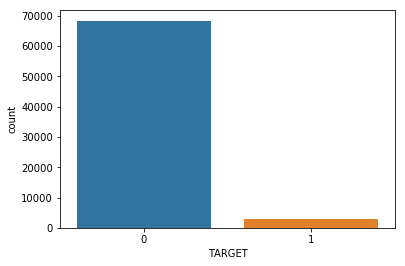

In [12]:
# Visualização gráfica da variável target
sns.countplot(data = df_treino, x = "TARGET")

É possível verificar que a variável target está totalmente desbalanceada, isto é, existe uma diferença muito grande entre clientes insatisfeitos (0) e clientes satisfeitos (1). Fazendo uma acurácia dos dados, é possíver ver que ela será extremamente alta justamente por conta deste desbalanceamento.

In [13]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


# Separando o array em componentes de input e output
X = df_treino.iloc[:,0:369]
Y = df_treino.iloc[:,369]

# Definindo o tamanho das amostras
teste_size = 0.3

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
D:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
D:\Anaconda3\lib\site

Acurácia nos Dados de Teste: 95.977%


In [15]:
# Para tratar isto, vamos usar a função SMOTE.
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
SM = SMOTE(random_state = 2)
X_treino_smoted, Y_treino_smoted = SM.fit_resample(X_treino, Y_treino)

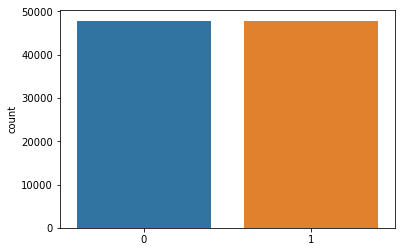

In [16]:
# Verificando a variável target após o balanceamento.
sns.countplot(Y_treino_smoted)

Validando novamente um teste de acurácia no conjunto de dados.

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Definindo valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross-Validation
resultado = cross_val_score(modelo, X_treino_smoted, Y_treino_smoted, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 50.016


Veja que obtivemos uma acurácia de 50%, ainda está longe do objetivo que é de no mínimo 70%.

# 6. Pré-Processamento

Nesta etapa, é importante realizar transformações nas variáveis.

Realizaremos agora a **Normalização dos Dados**, que tem como objetivo colocar os dados em um range de 0 à 1.

In [18]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X_treino_smoted)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", df_treino.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[2.0000000e+00 2.3000000e+01 0.0000000e+00 ... 0.0000000e+00
  3.9205170e+04 0.0000000e+00]
 [2.0000000e+00 3.4000000e+01 0.0000000e+00 ... 0.0000000e+00
  4.9278030e+04 0.0000000e+00]
 [2.0000000e+00 2.3000000e+01 0.0000000e+00 ... 0.0000000e+00
  6.7333770e+04 0.0000000e+00]
 ...
 [2.0000000e+00 3.9000000e+01 0.0000000e+00 ... 0.0000000e+00
  1.1863452e+05 0.0000000e+00]
 [2.0000000e+00 2.3000000e+01 0.0000000e+00 ... 0.0000000e+00
  7.4028150e+04 0.0000000e+00]
 [2.0000000e+00 2.5000000e+01 0.0000000e+00 ... 0.0000000e+00
  8.4278160e+04 0.0000000e+00]]

Dados Normalizados: 

 [[0.00851064 0.33333333 0.         ... 0.         0.         0.00629279]
 [0.00851064 0.19191919 0.         ... 0.         0.         0.00845535]
 [0.00851064 0.19191919 0.         ... 0.         0.         0.00710396]
 [0.00851064 0.18181818 0.         ... 0.         0.         0.00596996]
 [0.00851064 0.56565657 0.         ... 0.         0.         0.00556702]]


# 7. Algoritmos de Classificação

Utilizando algoritmo de **Regressão Logística** após a normalização dos dados.

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# Definindo valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross-Validation
resultado_logistic_regression = cross_val_score(modelo, rescaledX, Y_treino_smoted, cv = kfold, scoring = 'accuracy')

# Criando lista para salvar resultados de modelos
resultados_modelos = []
nome = []

# Salvando resultado na lista
resultados_modelos.append(resultado_logistic_regression)
nome.append("LR")

# Print dos resultados
print("Acurácia: %.3f" % (resultado_logistic_regression.mean() * 100))

Acurácia: 73.028


Usando **Linear Discriminant Analysis**

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LinearDiscriminantAnalysis()

# Cross Validation
resultado_LDA = cross_val_score(modelo, rescaledX, Y_treino_smoted, cv = kfold)

# Salvando na lista
resultados_modelos.append(resultado_LDA)
nome.append("LDA")

# Print do resultado
print("Acurácia: %.3f" % (resultado_LDA.mean() * 100))

Acurácia: 72.409


# 8. Seleção do Modelo

Comparando os modelos com uma representação gráfica

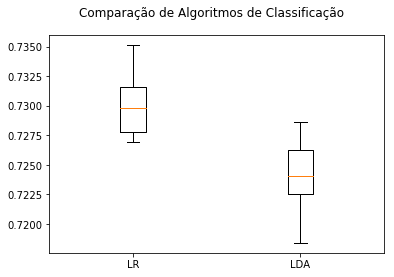

In [22]:
import matplotlib.pyplot as plt

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados_modelos)
ax.set_xticklabels(nome)
plt.show()

É possível perceber que o algoritmo de classificação **Regressão Logística** obteve melhor acurácia (73.028%).

# 9. Salvando o Resultado

In [51]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(rescaledX, Y_treino_smoted)

# Salvando o modelo
arquivo = 'modelos/modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo salvo!
Modelo carregado!
Acurácia: 95.397
